In [82]:
#import all required libraries 
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.python.framework import ops
# from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

In [83]:
#import data from the csv file
data = pd.read_csv('heart.csv')

In [84]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [85]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [86]:
#Define X and Y values. Y specifies whether person will have a heardisease or not(0=NO, 1=Yes) and X is rest of the columns.
X_data = data.loc[:, 'age':'thal']
Y_data = data.loc[:, 'target']
print("Shape of X_data is: ", X_data.shape)
print("Shape of Y_data is: ", Y_data.shape)

('Shape of X_data is: ', (303, 13))
('Shape of Y_data is: ', (303,))


In [87]:
#Split dataset into 80%train and 20% test set and reshape Y_train and Y_test.
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
Y_train = Y_train.values.reshape(Y_train.shape[0], 1)
Y_test = Y_test.values.reshape(Y_test.shape[0], 1)
print(Y_train.shape, Y_test.shape)

(242, 13)
(61, 13)
(242,)
((242, 1), (61, 1))


In [88]:
#assign number of train, test and input features to variables
m_train = X_train.shape[0]
m_test = X_test.shape[0]
num_features = X_train.shape[1]
print(m_train, m_test, num_features)

(242, 61, 13)


In [89]:
# #flatten the dataset Required only for data with more than 2 dimensions
# train_set_x_flatten = X_train.values.reshape(X_train.shape[0], -1).T
# test_set_x_flatten = X_test.values.reshape(X_test.shape[0], -1).T

#Taking the transpose to make life easier
X_train=X_train.T
X_test=X_test.T
Y_train=Y_train.T
Y_test=Y_test.T
print(X_train.shape)

(13, 242)


In [90]:
#Create Placeholders
def create_placeholders(n_x, n_y):
    X = tf.placeholder(tf.float32, shape=[n_x, None], name="X")
    Y = tf.placeholder(tf.float32, shape=[n_y, None], name="Y")
    return X, Y

In [91]:
#call placeholder method with x and y dimension values
X, Y = create_placeholders(13, 1)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("X_1:0", shape=(13, ?), dtype=float32)
Y = Tensor("Y_1:0", shape=(1, ?), dtype=float32)


In [92]:
#Initializing the parameters. The following are the dimensions I used for the parameters:
#                        W1 : [25, 13]
#                        b1 : [25, 1]
#                        W2 : [12, 25]
#                        b2 : [12, 1]
#                        W3 : [1, 12]
#                        b3 : [1, 1]

def initialize_parameters():
    W1 = tf.get_variable("W1", [25,13], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12, 25], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2", [12, 1], initializer=tf.zeros_initializer())
    W3 = tf.get_variable("W3", [1,12], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3", [1, 1], initializer=tf.zeros_initializer())
    
    #Creating parmeters dictionary
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [93]:
#Call initialize parameters to check values of W1, b1, W2, b2
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(25, 13) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


In [119]:
#Forward Propagation
def forward_propagation(X, parameters):
    print(X.shape)
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    print("shape of x is: ", X.shape, "shape of w1 is: ", W1.shape, "shape of x is: ", b1.shape)
    Z1 = tf.add(tf.matmul(W1, X), b1)                                # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                              # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                               # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                              # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                               # Z3 = np.dot(W3,Z2) + b3
#     print("Z1: ", Z1, "Z2: ", Z2, "Z3: ", Z3, "A1: ", A1, "A2: ", A2)
    return Z3
#     return Z2

In [120]:
#Calling the function forward_propagation
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(13, 1)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
#     Z2 = forward_propagation(X, parameters)
#     print("Z3 = " + str(Z3))
    print("Z3 = " + str(Z3))

(13, ?)
('shape of x is: ', TensorShape([Dimension(13), Dimension(None)]), 'shape of w1 is: ', TensorShape([Dimension(25), Dimension(13)]), 'shape of x is: ', TensorShape([Dimension(25), Dimension(1)]))
Z3 = Tensor("Add_2:0", shape=(1, ?), dtype=float32)


In [121]:
#Compute cost
def compute_cost(Z3, Y):
# def compute_cost(Z2, Y):

    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
    return cost
    

In [122]:
#Calling compute cost function
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(13, 1)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
#     Z2 = forward_propagation(X, parameters)
#     cost = compute_cost(Z2, Y)

    print("cost = " + str(cost))

(13, ?)
('shape of x is: ', TensorShape([Dimension(13), Dimension(None)]), 'shape of w1 is: ', TensorShape([Dimension(25), Dimension(13)]), 'shape of x is: ', TensorShape([Dimension(25), Dimension(1)]))
cost = Tensor("Mean:0", shape=(), dtype=float32)


In [125]:
# Build the model. Call all the helper function created.
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001, num_epochs = 1500, minibatch_size = 32, 
          print_cost = True):
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    #Create Placeholders
    X, Y = create_placeholders(n_x, n_y)
    print("n_x dim is: ", n_x)
    print("n_y dim is: ", n_y)
    print("x_trian", X_train.shape)
    #Initialize Parameters
    parameters = initialize_parameters()
    
    #Forward Propogation
    Z3 = forward_propagation(X, parameters)
#     Z2 = forward_propagation(X, parameters)
    #Compute cost
    cost = compute_cost(Z3, Y)
#     cost = compute_cost(Z2, Y)
    #Backpropagation: Due to tensorflow no need to compute each step. 
    #Just define the tensorflow optimizer. I am using an AdamOptimizer.
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    # Initialize all the variables
    init = tf.global_variables_initializer()
    
    #Starting the session
    with tf.Session() as sess:
        
        # Running the initialization
        sess.run(init)
        
        # Loop for number of epochs defined
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
#             num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
#             minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

#             for minibatch in minibatches:

                # Select a minibatch
#                 (minibatch_X, minibatch_Y) = minibatch
                
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
#                 _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
            _ , train_cost = sess.run([optimizer, cost], feed_dict={X: X_train, Y: Y_train})
                ### END CODE HERE ###
            epoch_cost += train_cost
#                 epoch_cost += minibatch_cost / num_minibatches
#             print(train_cost)
            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))
#         correct_prediction = tf.equal(tf.argmax(Z2), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(correct_prediction)
        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters
    
    

('n_x dim is: ', 13)
('n_y dim is: ', 1)
('x_trian', (13, 242))
(13, ?)
('shape of x is: ', TensorShape([Dimension(13), Dimension(None)]), 'shape of w1 is: ', TensorShape([Dimension(25), Dimension(13)]), 'shape of x is: ', TensorShape([Dimension(25), Dimension(1)]))
Cost after epoch 0: 0.000000
Cost after epoch 100: 0.000000
Cost after epoch 200: 0.000000
Cost after epoch 300: 0.000000
Cost after epoch 400: 0.000000
Cost after epoch 500: 0.000000
Cost after epoch 600: 0.000000
Cost after epoch 700: 0.000000
Cost after epoch 800: 0.000000
Cost after epoch 900: 0.000000
Cost after epoch 1000: 0.000000
Cost after epoch 1100: 0.000000
Cost after epoch 1200: 0.000000
Cost after epoch 1300: 0.000000
Cost after epoch 1400: 0.000000


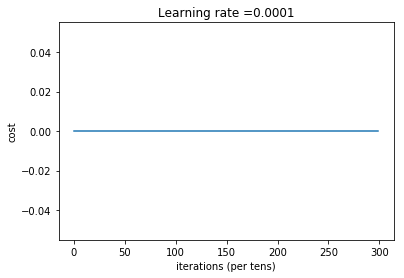

Parameters have been trained!
Tensor("Equal:0", shape=(?,), dtype=bool)
('Train Accuracy:', 1.0)
('Test Accuracy:', 1.0)


In [126]:
parameters = model(X_train, Y_train, X_test, Y_test)